<a href="https://colab.research.google.com/github/rabinderthakur9/The-Spark-Foundation-/blob/main/Prediction_using_Supervised_ML_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

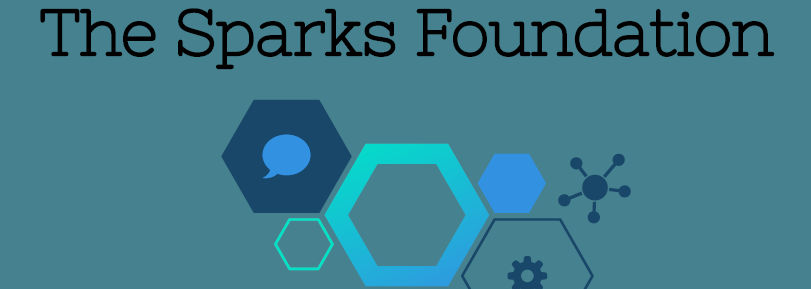

# The Spark Foundation Task 1(Rabindar Thakur)

Predict the percentage of an student based on the no. of study hours Using Simple Linear Regression with two variable.

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score
import joblib

# #Reading the Data

In [ ]:
#Creating the pandas DataFrame to Read The data 
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Saving the file for further Use Without the Index Number
data.to_csv('Spark Foundation.csv',index=False) 

In [ ]:
#Checking the Info of the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# #Visualization of the data variable

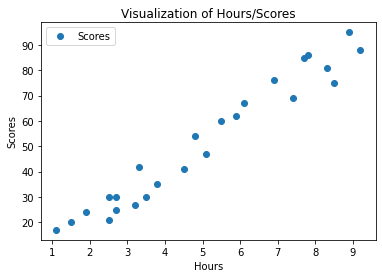

'As the Number of study hours increase the Scores also increases'

In [ ]:
data.plot(x='Hours',y='Scores',style='o')
plt.title("Visualization of Hours/Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()
'''As the Number of study hours increase the Scores also increases'''

## Validating the positivity of the relationship between two variable Using Correltion

In [ ]:
#validating the linear relationship between two variable
#The minimum number of observations required per pair of columns to have a valid result
data.corr(method='pearson',min_periods= 1)  #pearson: Standard correlation coefficient

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
data.corr(method='spearman') #spearman: Spearman rank correlation

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [ ]:
data.corr(method='kendall') #kendall: Kendall Taus correlation coefficient
                            #callable: Any callable that takes two 1d ndarrays as an input

,Hours,Scores
Hours,1.000000,0.884035
Scores,0.884035,1.000000


# #Data Prepration

In [ ]:
X = data.iloc[:, :-1].values  #Select the last second coloum value Using the inverse Indexing
y = data.iloc[:, 1].values    #selecting the last column

#Checking the shape of the data
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [ ]:
y.shape

(25,)

## Splitting the Data 

In [ ]:
#Splitting the Data Into Train and Test Variables
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

# #Training  the Algorithm

In [ ]:
#training the model with Linear regression
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [ ]:
#Checking the score of the train model 

reg.score(X_train,y_train)

0.9515510725211553

In [ ]:
#Regression Line
#Formula: y=mx+b
line = reg.coef_*X+reg.intercept_

In [ ]:
#Value of coefficent in out model
reg.coef_

array([9.91065648])

In [ ]:
#Value of intercept in our model
#The intercept (often labeled the constant) is the expected mean value of Y when all X=0
reg.intercept_

2.018160041434662

In [ ]:
#Using he Formula y=mx+b
9.91065648*9.5+2.018160041434683 #just for understanding

96.16939660143468

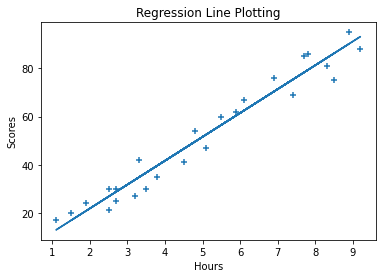

In [ ]:
#Plotting the regression line for both the variable 
plt.scatter(X,y,marker="+")
plt.plot(X,line)
plt.title("Regression Line Plotting")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# # Prediction

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Comparing the Actual and Predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Predicting the User Defined value
h = float(input("Enter the Floating Point Number:"))
s = reg.predict([[h]])
print("If a student studies for {} hours per day then he/she could score {} %".format(h,s))

Enter the Floating Point Number:2.25
If a student studies for 2.25 hours per day then he/she could score [24.31713712] %


In [ ]:
#The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

#It represents the proportion of variance (of y) that has been explained by the independent variables in the model 
print("r2 Score:",r2_score(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
r2 Score: 0.9454906892105354


## Task Successful,Thank You